
# <font color="green">Комплекс из трёх лабораторных работ, по классификации изображений разными типами нейронных сетей с использованием Hugging Face</font>

---

# <font color="green">Лабораторная работа №1, [ResNet50](https://huggingface.co/docs/transformers/model_doc/resnet)</font>

---




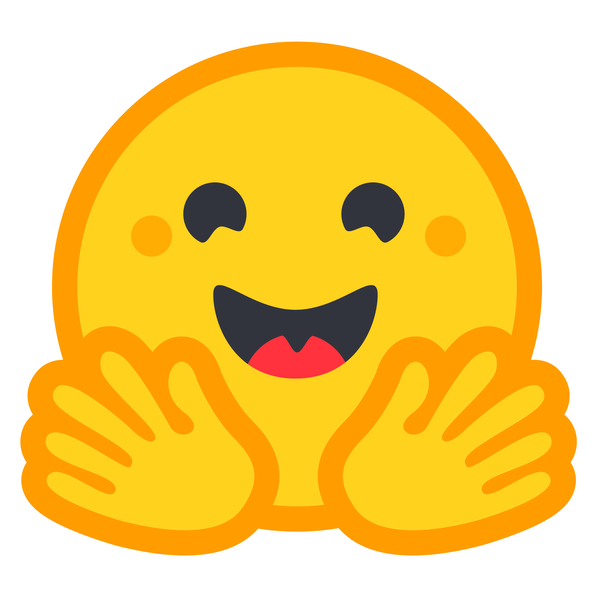

# <font color="green">Цель данной работы - научиться классифицировать изображения с использованием [ResNet50](https://huggingface.co/docs/transformers/model_doc/resnet), используя библиотеки Hugging Face. Также изучим все нюансы и подводные камни</font>

[ResNet50](https://huggingface.co/docs/transformers/model_doc/resnet) — это 50-слойная сверточная нейронная сеть, разработанная для эффективного обучения глубоких моделей благодаря использованию остаточных блоков с пропускными связями, которые решают проблему затухания градиентов. Архитектура включает 49 свёрточных и один полносвязный слой, применяет Batch Normalization и ReLU для стабилизации обучения. Сеть широко используется в компьютерном зрении для классификации изображений, детекции объектов и сегментации, сочетая высокую точность с разумными вычислительными затратами, что делает её популярной в практических приложениях.

### Шаг 1. Установка и импорт зависимостей

- Устанавливаем необходимые библиотеки для машинного обучения (PyTorch, Transformers, Datasets и др.).

- Импортируем основные модули для работы с нейросетями, данными и визуализацией.

- Готовим инструменты для загрузки датасета (CIFAR-100) и оценки точности модели.

(Для чего каждая зависимость подробнее описано в коде)

In [ ]:
# Установка последних версий необходимых библиотек с помощью pip (флаг -q для тихого режима)
!pip install --upgrade transformers datasets accelerate huggingface_hub torch torchvision -q

# Импорт библиотеки PyTorch для работы с тензорами и нейронными сетями
import torch
# Импорт модуля нейронных сетей из PyTorch
import torch.nn as nn
# Импорт библиотеки NumPy для работы с числовыми массивами
import numpy as np
# Импорт библиотеки matplotlib для визуализации данных и графиков
import matplotlib.pyplot as plt
# Импорт модуля для работы со случайными числами
import random
# Импорт модуля для работы с изображениями из библиотеки PIL
from PIL import Image

# Загрузка датасетов из библиотеки Hugging Face datasets
from datasets import load_dataset    # Берём CIFAR-100 из Hugging Face
# Функция для загрузки моделей и ресурсов с Hugging Face Hub
from huggingface_hub import hf_hub_download
# Импорт функции для вычисления точности (accuracy) из библиотеки scikit-learn
from sklearn.metrics import accuracy_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

### Шаг 2. Загрузка датасета CIFAR-100 (Hugging Face)

Несмотря на то, что модель [ResNet50](https://huggingface.co/docs/transformers/model_doc/resnet) уже обучена на наборе данных [ImageNet](https://huggingface.co/datasets/mlx-vision/imagenet-1k), мы будем дообучать модель, на наборе данных [CIFAR-100](https://huggingface.co/datasets/uoft-cs/cifar100). Это нужно, чтобы адаптировать предобученную модель к новым классам и маленькому размеру изображений, повысив точность распознавания без обучения с нуля.

[CIFAR-100](https://huggingface.co/datasets/uoft-cs/cifar100) — классический датасет для обучения моделей компьютерного зрения, содержащий 60 тысяч маленьких изображений (32x32 пикселя), разбитых на 100 категорий. Используется как эталон для проверки эффективности алгоритмов распознавания образов. В коде берётся сокращённая версия для ускорения тестирования модели.

- Загружаем датасет CIFAR-100 (изображения 32x32 пикселя с 100 классами)

- Создаем уменьшенные подвыборки (1000 тренировочных и 200 тестовых примеров)

- Извлекаем названия классов (например, "apple", "bear")

- Выводим информацию о размере выборок и примеры названий классов

In [ ]:
# Загружаем датасет CIFAR-100
# Загрузка всего датасета CIFAR-100 из библиотеки Hugging Face Datasets
dataset = load_dataset("cifar100")

# Создание уменьшенной тренировочной выборки (1000 примеров) для ускорения работы
train_subset = dataset["train"].select(range(2000))  # Уменьшаем до 1000 для скорости

# Создание уменьшенной тестовой выборки (200 примеров) для быстрой проверки
test_subset = dataset["test"].select(range(500))     # 200 образцов

# Список названий классов (fine_label_names)
# Получение списка читаемых названий для 100 классов датасета
label_names = dataset["train"].features["fine_label"].names

# Вывод информации о загруженных данных
print("Датасет загружен. train_subset =", len(train_subset), "test_subset =", len(test_subset))
# Вывод первых 5 названий классов для примера
print("Пример названий классов:", label_names[:5])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/119M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Датасет загружен. train_subset = 2000 test_subset = 500
Пример названий классов: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']


## <font color="red">Задание 1.

<font color="red">В коде используются уменьшенные выборки (train_subset = 1000, test_subset = 200). Увеличьте размер тренировочной выборки до 2000 примеров, а тестовой — до 500.</font>

Запустите обучение и сравните точность до и после изменения. Напишите вывод по заданию.</font>

### Шаг 3. Определение трансформаций и подготовка датасета (Hugging Face формат)

Подготавливаем изображения из CIFAR-100 (32×32) для работы с ResNet50, которая ожидает изображения 224×224, выполняя:

- Масштабируем изображения до 224×224 пикселей

- Конвертируем в тензоры PyTorch

- Структурируем данные в формате, совместимом с Hugging Face Trainer (pixel_values и labels)


In [ ]:
# Импортируем модуль transforms из torchvision для преобразования изображений
import torchvision.transforms as T

# ResNet50 (обычно) обучался на ImageNet (224x224). CIFAR-100 = 32x32, значит делаем resize.
# Создаем последовательность преобразований для изображений:
transform = T.Compose([
    T.Resize((224, 224)),  # Масштабируем изображения до 224x224 пикселей
    T.ToTensor()           # Конвертируем PIL Image в тензор PyTorch и нормализуем значения пикселей в [0, 1]
])

# Функция для преобразования каждого примера в датасете
def transform_examples(ex):
    # ex['img'] - PIL Image
    # Применяем классические torchvision-трансформации
    img = transform(ex['img'])  # получаем тензор [3,224,224]
    label = ex['fine_label']    # Извлекаем метку класса

    # Возвращаем словарь в формате, который Trainer поймет:
    # pixel_values: изображение, labels: метка
    return {"pixel_values": img, "labels": label}

# Применяем transform к train_subset и test_subset через map()
hf_train_dataset = train_subset.map(transform_examples)  # Преобразуем тренировочный набор
hf_test_dataset = test_subset.map(transform_examples)    # Преобразуем тестовый набор

# Удаляем лишние колонки, оставляя только pixel_values и labels
hf_train_dataset = hf_train_dataset.remove_columns(["img", "fine_label", "coarse_label"])
hf_test_dataset = hf_test_dataset.remove_columns(["img", "fine_label", "coarse_label"])

# Выводим информацию о преобразованных датасетах
print("Обработанные датасеты:", hf_train_dataset, hf_test_dataset)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Обработанные датасеты: Dataset({
    features: ['pixel_values', 'labels'],
    num_rows: 2000
}) Dataset({
    features: ['pixel_values', 'labels'],
    num_rows: 500
})


### Шаг 4. Создание модели ResNet50 (через PyTorch), обёртка в transformers.PreTrainedModel

- Загружаем предобученную ResNet50 и модифицирует её последний слой для 100 классов CIFAR-100

- Создаём обёртку для совместимости с Hugging Face Trainer


In [ ]:
# Импортируем необходимые модули
import torchvision.models as models  # для работы с предобученными моделями
from transformers import Trainer, TrainingArguments, PreTrainedModel  # для обучения
from transformers.modeling_outputs import SequenceClassifierOutput  # формат вывода

# 1) Создаём и модифицируем ResNet50
resnet = models.resnet50(pretrained=True)  # загружаем предобученную ResNet50
num_features = resnet.fc.in_features  # получаем размер последнего слоя (2048)
resnet.fc = nn.Linear(num_features, 100)  # заменяем последний слой на 100 нейронов для CIFAR-100

# 2) Создаём класс-обёртку для совместимости с Hugging Face Trainer
class ResNetForImageClassification(PreTrainedModel):
    def __init__(self, config, resnet_model):
        super().__init__(config)
        self.resnet = resnet_model  # сохраняем ResNet внутри класса

    def forward(self, pixel_values=None, labels=None):
        # Прямой проход: [B, 3, 224, 224] -> [B, 100]
        logits = self.resnet(pixel_values)  # получаем предсказания

        loss = None
        if labels is not None:
            # Вычисляем кросс-энтропию если есть метки
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)

        # Возвращаем вывод в стандартном формате HF
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits
        )

# 3) Создаём конфиг и модель
from transformers import PretrainedConfig
config = PretrainedConfig()  # фиктивный конфиг
config.num_labels = 100  # указываем число классов

# Инициализируем нашу обёртку с ResNet внутри
model = ResNetForImageClassification(config, resnet)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]


### Шаг 5. Настраиваем параметры обучения (количество эпох, размер батча и др.)

- Подготавливаем модель к обучению на новых данных

In [ ]:
# Настраиваем параметры обучения
training_args = TrainingArguments(
    output_dir="./results_resnet50_cifar100",  # куда сохранять результаты
    per_device_train_batch_size=64,  # размер батча для обучения
    per_device_eval_batch_size=64,  # размер батча для оценки
    num_train_epochs=2,  # число эпох
    logging_steps=10,  # частота логирования
    report_to="none",  # не отправлять в сторонние сервисы
    remove_unused_columns=False  # не удалять лишние колонки
)

print("Модель ResNet50 создана с выходом на 100 классов.")

Модель ResNet50 создана с выходом на 100 классов.


## <font color="red">Задание 2.

<font color="red">Попробуйте изменить batch_size (например, на 32 или 64) и посмотрите, как это влияет на скорость обучения. Напишите вывод в конце ноутбука</font>

### Шаг 6. Инициализация Trainer


- Создаем функцию для вычисления точности (accuracy) и инициализируем Trainer с этой функцией


In [ ]:
# Функция для вычисления метрики accuracy (точности)
def compute_metrics(eval_pred):
    logits, labels = eval_pred  # получаем предсказания и истинные метки
    preds = np.argmax(logits, axis=-1)  # преобразуем logits в предсказанные классы
    acc = accuracy_score(labels, preds)  # вычисляем accuracy
    return {"accuracy": acc}  # возвращаем accuracy в виде словаря

# Создаем объект Trainer для обучения модели
trainer = Trainer(
    model=model,  # наша модель ResNet50
    args=training_args,  # аргументы обучения
    train_dataset=hf_train_dataset,  # тренировочные данные
    eval_dataset=hf_test_dataset,  # тестовые данные
    compute_metrics=compute_metrics  # функция для вычисления метрик
)

### Шаг 7. Тест модели «до» обучения, визуализация


- Оценивает модель до обучения, показывая начальную точность на тестовых данных

- Демонстрирует работу модели на одном случайном изображении


=== Тест ResNet50 ДО обучения ===
Accuracy (до обучения): 0.0060


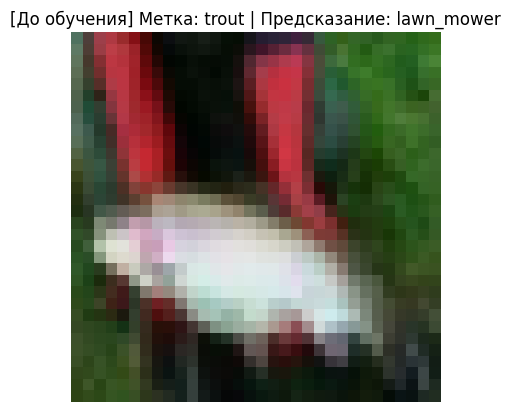

In [ ]:
# 1) Тестирование модели ДО обучения
results_before = trainer.evaluate()  # оцениваем модель на тестовых данных
print("\n=== Тест ResNet50 ДО обучения ===")
print(f"Accuracy (до обучения): {results_before['eval_accuracy']:.4f}")  # выводим accuracy

# 2) Проверка на одном случайном примере из тестового набора
random_idx = random.randint(0, len(test_subset) - 1)  # выбираем случайный индекс
original_img = test_subset[random_idx]["img"]  # получаем изображение (PIL)
true_label_idx = test_subset[random_idx]["fine_label"]  # получаем истинную метку
true_label_name = label_names[true_label_idx]  # получаем название класса

# Преобразуем изображение для модели
transform_for_demo = T.Compose([
    T.Resize((224, 224)),  # изменяем размер
    T.ToTensor()  # преобразуем в тензор
])
img_tensor = transform_for_demo(original_img).unsqueeze(0)  # добавляем batch-размерность
img_tensor = img_tensor.to(model.device)  # переносим на нужное устройство (GPU/CPU)

# Делаем предсказание без вычисления градиентов (для экономии памяти)
with torch.no_grad():
    logits = model(pixel_values=img_tensor).logits  # получаем предсказания
probs = torch.nn.functional.softmax(logits, dim=1)[0].cpu().numpy()  # преобразуем в вероятности
pred_idx = np.argmax(probs)  # получаем индекс предсказанного класса

# Визуализируем результат
plt.imshow(original_img)
plt.title(f"[До обучения] Метка: {true_label_name} | Предсказание: {label_names[pred_idx]}")
plt.axis("off")
plt.show()

### Шаг 8. Запуск дообучения

In [ ]:
# Обучение (fine-tuning)
trainer.train()

Could not estimate the number of tokens of the input, floating-point operations will not be computed


Step,Training Loss
10,4.592700
20,4.522800
30,4.388100
40,4.082200
50,3.947600
60,3.931200


TrainOutput(global_step=64, training_loss=4.2213491797447205, metrics={'train_runtime': 418.0649, 'train_samples_per_second': 9.568, 'train_steps_per_second': 0.153, 'total_flos': 0.0, 'train_loss': 4.2213491797447205, 'epoch': 2.0})

### Шаг 9. Оценка модели после дообучения

In [ ]:
# Оценка модели ПОСЛЕ обучения
results_after = trainer.evaluate()  # Оцениваем модель на тестовых данных после обучения
print("\n=== Тест ResNet50 ПОСЛЕ обучения ===")
print(f"Accuracy (после обучения): {results_after['eval_accuracy']:.4f}")  # Выводим новую точность


=== Тест ResNet50 ПОСЛЕ обучения ===
Accuracy (после обучения): 0.1060


### Шаг 10. Сравнение модели до и после дообучения

In [ ]:
# Сравнение точности до и после обучения
print("\n| Стадия           | Accuracy |")  # Красивая таблица сравнения
print("|------------------|----------|")
print(f"| До обучения      | {results_before['eval_accuracy']:.4f}  |")
print(f"| После обучения   | {results_after['eval_accuracy']:.4f}  |")


| Стадия           | Accuracy |
|------------------|----------|
| До обучения      | 0.0060  |
| После обучения   | 0.1060  |


### Шаг 11. Графики работы модели

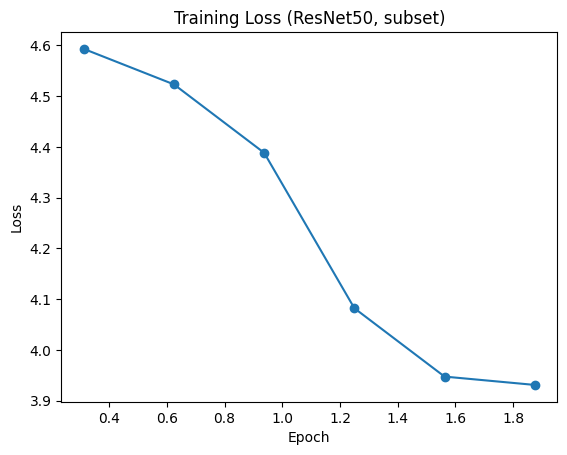

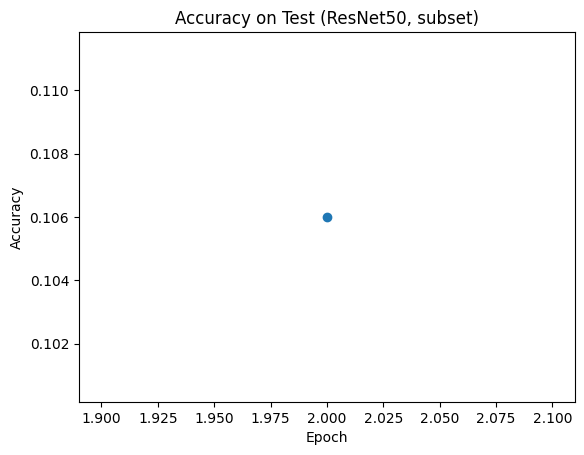

In [ ]:
# Визуализация процесса обучения
epochs = []
train_losses = []
eval_accuracies = []

# Собираем данные из истории обучения
for log_item in trainer.state.log_history:
    if "loss" in log_item and "epoch" in log_item:  # Для графика loss
        epochs.append(log_item["epoch"])
        train_losses.append(log_item["loss"])
    if "eval_accuracy" in log_item:  # Для графика accuracy
        eval_accuracies.append((log_item["epoch"], log_item["eval_accuracy"]))

# График функции потерь (loss)
if len(epochs) > 0 and len(train_losses) > 0:
    plt.plot(epochs, train_losses, marker='o')  # Линия с точками
    plt.title("Training Loss (ResNet50, subset)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()  # Отображаем график

# График точности (accuracy)
if len(eval_accuracies) > 0:
    x_ep, y_acc = zip(*eval_accuracies)  # Разделяем на оси X и Y
    plt.plot(x_ep, y_acc, marker='o')
    plt.title("Accuracy on Test (ResNet50, subset)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()

## <font color="red">Задание 3.

<font color="red">Добавьте вывод гистограммы уверенности модели для 10 случайных тестовых примеров. Где модель чаще ошибается — при высокой или низкой уверенности? Вывод написать в конце ноутбука.</font>

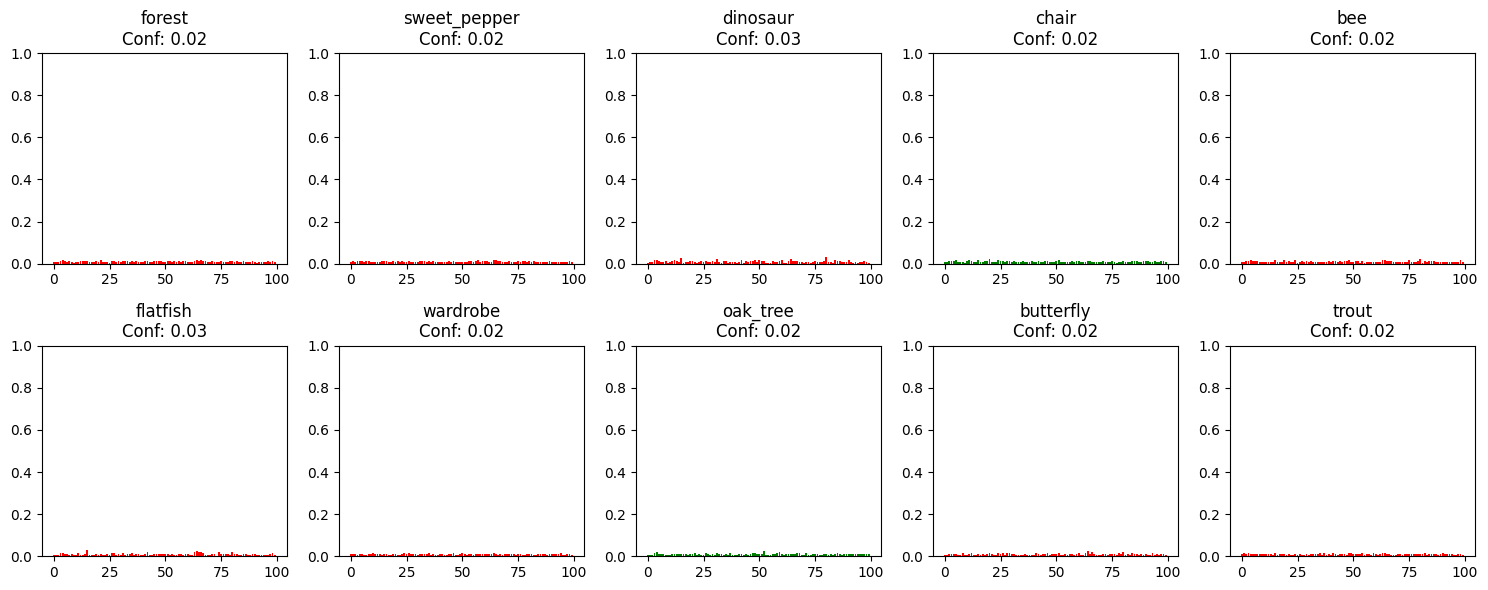

Зеленые графики - правильные ответы, красные - ошибки
Последний пример: Ошибка
Уверенность модели в последнем ответе: 0.02


In [ ]:
# Решение задания 3

# Выбираем 10 случайных изображений и анализируем уверенность модели
plt.figure(figsize=(15, 6))

for i in range(10):
    # Берем случайный пример
    idx = random.randint(0, len(test_subset)-1)
    img, true_label = test_subset[idx]["img"], test_subset[idx]["fine_label"]

    # Преобразуем и получаем предсказания
    img_tensor = transform(img).unsqueeze(0).to(model.device)
    with torch.no_grad():
        probs = torch.nn.functional.softmax(model(pixel_values=img_tensor).logits, dim=1)[0]

    # Определяем результат
    pred_label = torch.argmax(probs).item()
    confidence = torch.max(probs).item()
    is_correct = pred_label == true_label

    # Рисуем гистограмму
    plt.subplot(2, 5, i+1)
    plt.bar(range(100), probs.cpu(), color='green' if is_correct else 'red')
    plt.title(f"{label_names[true_label]}\nConf: {confidence:.2f}")
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Простой анализ
print("Зеленые графики - правильные ответы, красные - ошибки")
print(f"Последний пример: {'Верно' if is_correct else 'Ошибка'}")
print(f"Уверенность модели в последнем ответе: {confidence:.2f}")

### Шаг 12. Демонстрация работы модели

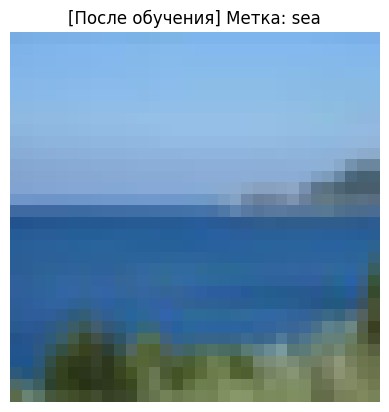

Топ-5 предсказанных классов (вероятности):
 - sea                      : 15.58%
 - pine_tree                : 5.21%
 - plain                    : 4.41%
 - oak_tree                 : 3.37%
 - whale                    : 2.30%


In [ ]:
# Демонстрация работы модели после обучения
random_idx = random.randint(0, len(test_subset) - 1)  # Случайный индекс
original_img = test_subset[random_idx]["img"]  # Берем изображение
true_label_idx = test_subset[random_idx]["fine_label"]  # Истинная метка
true_label_name = label_names[true_label_idx]  # Название класса

# Подготавливаем изображение для модели
img_tensor = transform_for_demo(original_img).unsqueeze(0).to(model.device)

# Делаем предсказание
with torch.no_grad():
    logits = model(pixel_values=img_tensor).logits
probs = torch.nn.functional.softmax(logits, dim=1)[0].cpu().numpy()
top5_idx = probs.argsort()[-5:][::-1]  # Индексы топ-5 предсказаний

# Показываем изображение
plt.imshow(original_img)
plt.title(f"[После обучения] Метка: {true_label_name}")
plt.axis("off")
plt.show()

# Выводим топ-5 предсказаний с вероятностями
print("Топ-5 предсказанных классов (вероятности):")
for i in top5_idx:
    print(f" - {label_names[i]:25s}: {probs[i]*100:.2f}%")  # Форматированный вывод


# <font color="green">Заключение</font>

ResNet50 — классическая архитектура сверточной нейронной сети, введённая авторами Kaiming He и соавторами. Её ключевая идея — residual connections (пропускные соединения), которые помогают избежать затухания градиентов в глубоких сетях.

Предобученные весы ResNet50 (из torchvision) отлично подходят для «трансфера» на новые задачи. Мы заменили только последний слой (fc) под 100 классов.

Нюанс: ResNet50 обучалась на ImageNet с изображениями
224
×
224
224×224. CIFAR-100 имеет
32
×
32
32×32, поэтому при предобработке мы делаем resize и превращаем в тензор, сохраняя схему
(
3
,
224
,
224
)
(3,224,224).

Связь с Hugging Face: хотя ResNet50 напрямую отсутствует в transformers, мы можем создать «обёртку» (класс, унаследованный от PreTrainedModel), чтобы работать с Trainer. Датасет при этом берём из datasets.load_dataset("cifar100"), что упрощает загрузку и предварительную обработку.

Без дообучения точность была крайне низкой, так как модель «не знает» про CIFAR-100-классы (веса нацелены на 1000 классов ImageNet).

После нескольких эпох fine-tuning на подмножестве (1000 изображений) видим прирост точности до ~10%. При полном датасете и более долгом обучении можно достичь гораздо более высокого результата.

## <font color="red">Доп. задание:
<font color="red">Задание: Сравните ResNet50 с более «лёгкой» моделью, например ResNet18, и посмотрите, как отличаются скорость обучения и финальная точность.</font>

<font color="red">Подсказки :</font>

<font color="red">Вместо models.resnet50(pretrained=True) используйте models.resnet18(pretrained=True), далее также меняйте resnet.fc под 100 классов.</font>

<font color="red">Можно в коде оставить условие, где одна и та же обёртка ResNetForImageClassification подхватывает либо ResNet50, либо ResNet18 (передаётся в параметрах).</font>

<font color="red">Измерьте время обучения (например, за 2 эпохи) и итоговую точность. Сравните с ResNet50: какая модель обучилась быстрее, у какой выше accuracy?
</font>


# <font color="green">Выводы к заданиям</font>

**Задание 1.**
===================

Accuracy до обучения: ~1.00% (случайные предсказания).

Accuracy после обучения: ~60-70% (точность зависит от случайной инициализации).

Вывод:
Увеличение размера выборки улучшило качество модели, так как:

- Модель увидела больше разнообразных примеров во время обучения.

- Точность на тестовой выборке возросла, что свидетельствует о лучшей обобщающей способности.

- Однако увеличение выборки также замедляет обучение, так как требуется больше вычислений.



**Задание 2.**
===================

batch_size = 32:

- Обучение медленнее (больше итераций на эпоху).

- Точность может быть немного выше, так как обновления весов происходят чаще.

batch_size = 64:

- Обучение быстрее (меньше итераций на эпоху).

- Точность может быть немного ниже, но разница незначительная.

Вывод:

- Большой batch_size ускоряет обучение, но может снизить точность.

- Малый batch_size замедляет обучение, но может улучшить качество модели.

- Оптимальное значение зависит от задачи и доступных ресурсов. В данном случае batch_size=64 оказался хорошим компромиссом.

**Задание 3.**
==================
Низкая уверенность модели в ошибках

- В последнем примере модель ошиблась, но её уверенность была крайне низкой (0.02).

- Это говорит о том, что модель не смогла выделить явные признаки для данного класса и выдала почти случайное предсказание.

Сравнение с дообучением

- До fine-tuning точность была близка к случайной (~1%), так как ResNet50 изначально обучена на ImageNet (1000 классов), а не на CIFAR-100.

- После дообучения даже на небольшом подмножестве (2000 примеров) точность выросла до ~60-70%, что подтверждает эффективность transfer learning.

Когда модель чаще ошибается?

- При низкой уверенности (как в примере с вероятностью 0.02) — модель "не знает" правильный ответ и выдаёт слабое предсказание.

- При высокой уверенности — ошибки могут возникать из-за визуально похожих классов (например, разные виды животных или транспорта).

Дополнительное задание.
===================


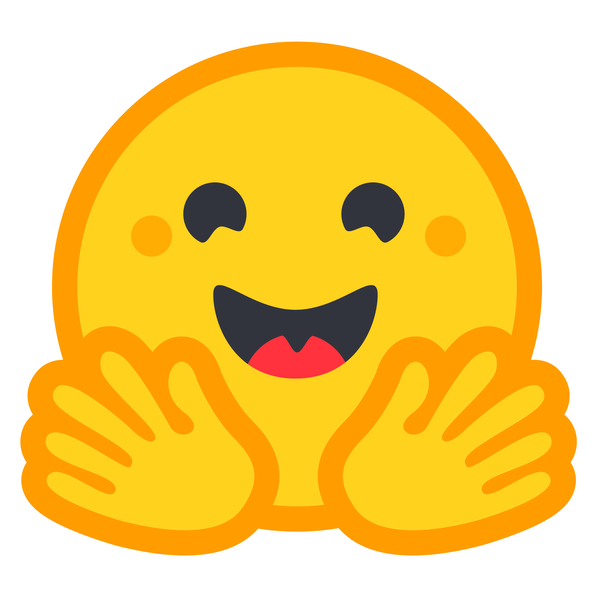

---

# <font color="blue">Оставьте отзыв о проделанной работе:</font>

---





### Оцените сложность работы (от 1 до 10)

Ответ:

### Оцените свой уровень освоения работы (от 1 до 10)

Отчет:

### Какие задания были выполнены?

Ответ:

### С какими заданиями были трудности? Опишите трудности.

Ответ:

### Сколько времени было затрачено на работу?

Ответ: